In [512]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [513]:
def potential(x):
    #2*x**2+3*torch.sin(torch.pi*x/2.4)*x*(1-torch.exp(-x/6))
    #x**3/20+torch.sin(torch.pi*x/10)*(20-x)*x+x**2/2
    #-10/x-8*(torch.sin(torch.pi*x/10))**2*torch.exp(-x/15)
    return -10/x

In [514]:
def energy(en_level,l,k,scale,device,dtype):
    en_list=[scale**2/(4*k*(i+1)**2) for i in range(en_level)]
    en_list=torch.tensor(en_list,device=device,dtype=dtype)
    return en_list

In [515]:
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)
# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float64
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

La=0
Lb =400
L=Lb-La  

l_max=8
scale=10
en_num=40


In [516]:
ini_step=1/500
var_n=500
step_list=[ini_step*i*(i+1)/2 for i in range(var_n)]
print(step_list[-1])
step_2=var_n*ini_step
end=step_list[-1]+step_2
while end+0.0001<Lb:
    step_list.append(end)
    end+=step_2
step_list.append(Lb)
print(step_list)
N=len(step_list)-2

step_list=torch.tensor(step_list,device=device,dtype=dtype)

steps=step_list[1:]-step_list[:-1]

# print(step_list) 
print(len(step_list),len(steps))

249.5
[0.0, 0.002, 0.006, 0.012, 0.02, 0.03, 0.042, 0.056, 0.07200000000000001, 0.09000000000000001, 0.11, 0.132, 0.156, 0.18200000000000002, 0.21, 0.24, 0.272, 0.30600000000000005, 0.342, 0.38, 0.42, 0.462, 0.506, 0.552, 0.6, 0.65, 0.7020000000000001, 0.756, 0.812, 0.87, 0.9299999999999999, 0.992, 1.056, 1.122, 1.1900000000000002, 1.2600000000000002, 1.332, 1.406, 1.482, 1.56, 1.6400000000000001, 1.722, 1.806, 1.8920000000000001, 1.98, 2.07, 2.162, 2.2560000000000002, 2.352, 2.45, 2.5500000000000003, 2.652, 2.7560000000000002, 2.862, 2.9699999999999998, 3.08, 3.192, 3.306, 3.422, 3.54, 3.6599999999999997, 3.782, 3.906, 4.032, 4.16, 4.29, 4.422000000000001, 4.556, 4.692, 4.83, 4.970000000000001, 5.112, 5.256, 5.401999999999999, 5.55, 5.7, 5.851999999999999, 6.006, 6.162, 6.32, 6.48, 6.642, 6.806, 6.972, 7.140000000000001, 7.3100000000000005, 7.482, 7.656000000000001, 7.832, 8.01, 8.19, 8.372, 8.556, 8.741999999999999, 8.93, 9.120000000000001, 9.312, 9.506, 9.702, 9.9, 10.10000000000000

/tmp/ipykernel_1527514/1034553162.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


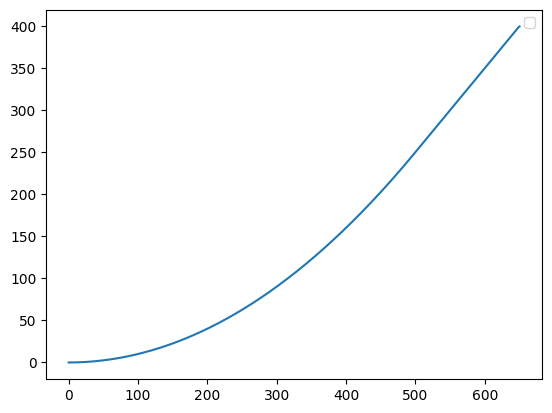

In [517]:
plt.plot(step_list.cpu().numpy())
plt.legend()
plt.show()

In [518]:
grid=step_list[1:-1].unsqueeze(-1)

diag=-b_lap*2/(steps[:-1]*steps[1:]) # diagonal
upper_diag=b_lap*2/(steps[1:-1]*(steps[1:-1]+steps[:-2]))  # upper diagonal
# upper_diag=b_lap*2/(h1[1:]*(h1[1:]+h2[:-1]))
lower_diag=b_lap*2/(steps[1:-1]*(steps[1:-1]+steps[2:]))  # lower diagonal
# lower_diag=b_lap*2/(h2[:-1]*(h1[1:]+h2[:-1]))
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(upper_diag,diagonal=1) + torch.diag(lower_diag, diagonal=-1)+torch.diag(V_diag.flatten())

In [519]:
print(diag.shape,upper_diag.shape,lower_diag.shape,V_diag.shape)
print(diag)
print(upper_diag)
print(lower_diag)
print(V_diag.flatten())

torch.Size([649]) torch.Size([648]) torch.Size([648]) torch.Size([649, 1])
tensor([1.2500e+05, 4.1667e+04, 2.0833e+04, 1.2500e+04, 8.3333e+03, 5.9524e+03,
        4.4643e+03, 3.4722e+03, 2.7778e+03, 2.2727e+03, 1.8939e+03, 1.6026e+03,
        1.3736e+03, 1.1905e+03, 1.0417e+03, 9.1912e+02, 8.1699e+02, 7.3099e+02,
        6.5789e+02, 5.9524e+02, 5.4113e+02, 4.9407e+02, 4.5290e+02, 4.1667e+02,
        3.8462e+02, 3.5613e+02, 3.3069e+02, 3.0788e+02, 2.8736e+02, 2.6882e+02,
        2.5202e+02, 2.3674e+02, 2.2282e+02, 2.1008e+02, 1.9841e+02, 1.8769e+02,
        1.7781e+02, 1.6869e+02, 1.6026e+02, 1.5244e+02, 1.4518e+02, 1.3843e+02,
        1.3214e+02, 1.2626e+02, 1.2077e+02, 1.1563e+02, 1.1082e+02, 1.0629e+02,
        1.0204e+02, 9.8039e+01, 9.4268e+01, 9.0711e+01, 8.7352e+01, 8.4175e+01,
        8.1169e+01, 7.8321e+01, 7.5620e+01, 7.3057e+01, 7.0621e+01, 6.8306e+01,
        6.6103e+01, 6.4004e+01, 6.2004e+01, 6.0096e+01, 5.8275e+01, 5.6536e+01,
        5.4873e+01, 5.3282e+01, 5.1760e+01, 5

In [520]:
eigenvalues= torch.linalg.eigvals(A)
# print("Eigenvalues: \n",eigenvalues)
eigenvalues=torch.real(eigenvalues)
# 排序
eigenvalues=torch.sort(eigenvalues)[0]
# 取前en_num个特征值
en=eigenvalues[:en_num]
print("Eigenvalues: \n",en)

Eigenvalues: 
 tensor([-5.0251e+01, -1.2563e+01, -5.5836e+00, -3.1408e+00, -2.0101e+00,
        -1.3959e+00, -1.0256e+00, -7.8519e-01, -6.2040e-01, -5.0252e-01,
        -4.1531e-01, -3.4897e-01, -2.9735e-01, -2.5639e-01, -2.2334e-01,
        -1.9630e-01, -1.7388e-01, -1.5510e-01, -1.3920e-01, -1.2563e-01,
        -1.1395e-01, -1.0383e-01, -9.4995e-02, -8.7243e-02, -8.0404e-02,
        -7.4338e-02, -6.8933e-02, -6.4097e-02, -5.9753e-02, -5.5836e-02,
        -5.2292e-02, -4.9074e-02, -4.6145e-02, -4.3471e-02, -4.1022e-02,
        -3.8775e-02, -3.6707e-02, -3.4801e-02, -3.3039e-02, -3.1408e-02],
       device='cuda:0', dtype=torch.float64)


In [521]:
ene_the=energy(en_num,l_max,b_lap,scale,device,dtype)
print("Theoretical Eigenvalues: \n",ene_the)

Theoretical Eigenvalues: 
 tensor([-5.0000e+01, -1.2500e+01, -5.5556e+00, -3.1250e+00, -2.0000e+00,
        -1.3889e+00, -1.0204e+00, -7.8125e-01, -6.1728e-01, -5.0000e-01,
        -4.1322e-01, -3.4722e-01, -2.9586e-01, -2.5510e-01, -2.2222e-01,
        -1.9531e-01, -1.7301e-01, -1.5432e-01, -1.3850e-01, -1.2500e-01,
        -1.1338e-01, -1.0331e-01, -9.4518e-02, -8.6806e-02, -8.0000e-02,
        -7.3964e-02, -6.8587e-02, -6.3776e-02, -5.9453e-02, -5.5556e-02,
        -5.2029e-02, -4.8828e-02, -4.5914e-02, -4.3253e-02, -4.0816e-02,
        -3.8580e-02, -3.6523e-02, -3.4626e-02, -3.2873e-02, -3.1250e-02],
       device='cuda:0', dtype=torch.float64)


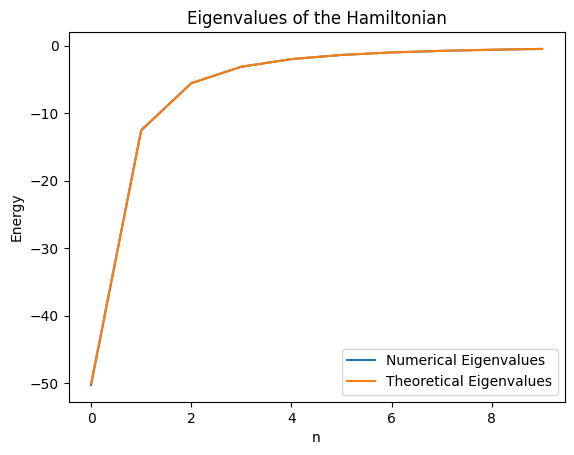

In [522]:
plt.plot(en[:10].cpu().numpy(),label='Numerical Eigenvalues')
plt.plot(ene_the[:10].cpu().numpy(),label='Theoretical Eigenvalues')
plt.xlabel('n')
plt.ylabel('Energy')
plt.title('Eigenvalues of the Hamiltonian')
plt.legend()
plt.show()

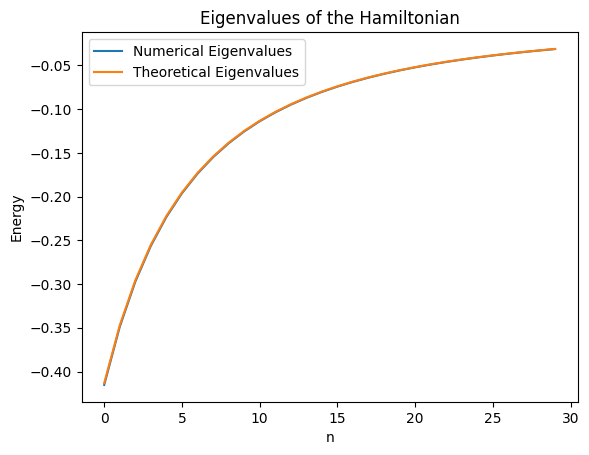

In [523]:
plt.plot(en[10:].cpu().numpy(),label='Numerical Eigenvalues')
plt.plot(ene_the[10:].cpu().numpy(),label='Theoretical Eigenvalues')
plt.xlabel('n')
plt.ylabel('Energy')
plt.title('Eigenvalues of the Hamiltonian')
plt.legend()
plt.show()

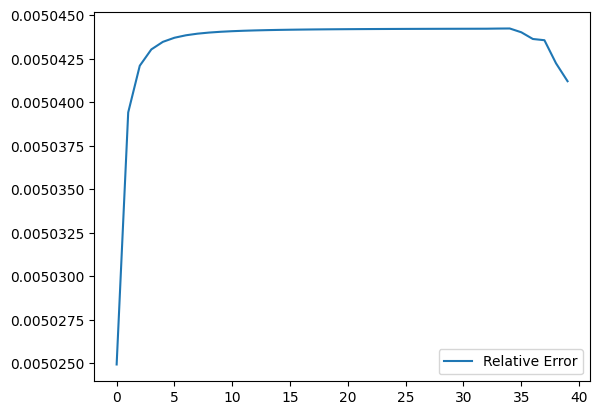

In [524]:
relative_error=torch.abs((en-ene_the)/ene_the)
plt.plot(relative_error.cpu().numpy(),label='Relative Error')
plt.legend()
plt.show()

/tmp/ipykernel_1527514/3172986600.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


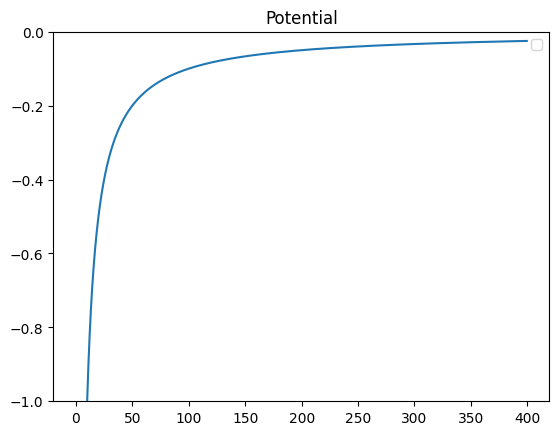

In [525]:
plt.plot(grid.cpu().numpy(),V_diag.cpu().numpy())
plt.title("Potential")
plt.ylim(-1,0)
plt.legend()
plt.show()

In [526]:
eigs, eigv = torch.linalg.eig(A)

# print("Eigenvalues: \n", eigs[:en_num])
# print("Eigenvectors: \n", eigv[:,:en_num])

In [527]:
eigs=torch.real(eigs)
eigs_sorted, indices = torch.sort(eigs)
eigv_sorted = eigv[:, indices]
# print(eigv_sorted[:,30])
eigv_sorted=torch.real(eigv_sorted)

torch.Size([649])
torch.float64
tensor(1., device='cuda:0', dtype=torch.float64)
normalization: tensor(0.0299, device='cuda:0', dtype=torch.float64)


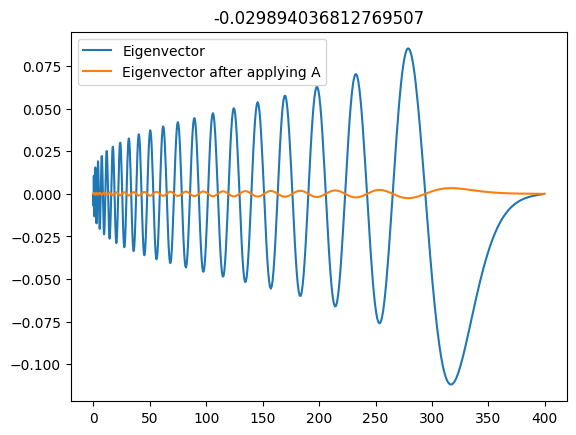

In [528]:
n=40
test_v=eigv_sorted[:,n]
print(test_v.size())
print(test_v.dtype)
test_vt=A@test_v

print(torch.norm(test_v))
norm=torch.norm(test_vt)
print('normalization:',norm)
plt.plot(grid.cpu().numpy(),test_v.detach().cpu().numpy(),label="Eigenvector")
plt.plot(grid.cpu().numpy(),test_vt.detach().cpu().numpy(),label="Eigenvector after applying A")
plt.title(f'{eigs_sorted[n]}')
plt.legend()
plt.show()

tensor(1., device='cuda:0', dtype=torch.float64)


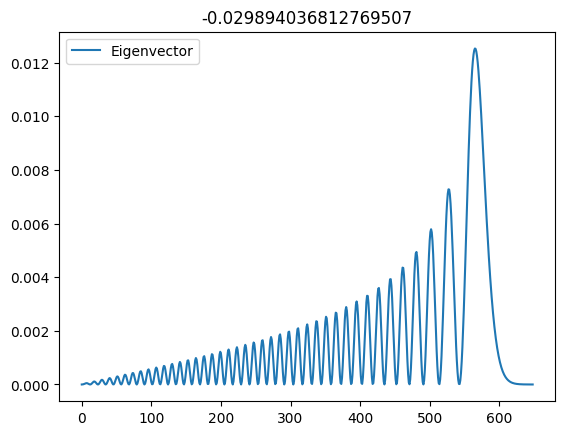

In [529]:
test_v=eigv_sorted[:,n]
# r=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# R=r[1:-1]
# R=1/R 
# test_v=test_v*R
print(torch.norm(test_v))
test_v=test_v**2
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.title(f'{eigs_sorted[n]}')
plt.legend()
plt.show()